# Finding Correlation Between Many Variables

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('CompletedDataset.csv', index_col = 0)
df.head(3)

,AQI,Precipitation,GDP,Temperature,Longititute,Latitude,Altitude,PopulationDensity,Coastal,GreenCoverageRate,"Incineration(10,000ton)"
City,,,,,,,,,,,
Ngawa Prefecture,23,665.1,271.13,8.200000,102.22465,31.89941,2617.0,11,0,36.00,23.0
Aksu City,137,80.4,610.00,12.276712,80.26338,41.16754,1108.0,6547,0,33.94,23.0
Alxa League,85,150.0,322.58,24.200000,105.72895,38.85192,1673.0,1,0,36.00,23.0


In [36]:
df.describe()


,AQI,Precipitation,GDP,Temperature,Longititute,Latitude,Altitude,PopulationDensity,Coastal,GreenCoverageRate,Incineration
count,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000
mean,75.334365,1081.208978,2394.094241,15.989429,113.985779,31.843767,382.250464,2596.560372,0.247678,38.383096,52.418390
std,42.995735,584.634075,3263.974279,5.029369,7.711894,6.099390,743.219135,2913.835552,0.432334,6.321973,91.976476
min,12.000000,56.100000,22.500000,-2.500000,80.105800,18.234043,-12.000000,1.000000,0.000000,7.600000,1.530000
25%,45.000000,581.000000,761.685000,13.750000,111.060575,27.664188,18.000000,714.000000,0.000000,36.000000,18.875000
50%,69.000000,910.000000,1328.520000,16.515068,115.500183,31.340637,62.000000,1787.000000,0.000000,38.690000,24.000000
75%,102.000000,1651.250000,2722.180000,18.928767,119.867274,36.419417,354.500000,3509.000000,0.000000,42.675000,37.630000
max,296.000000,2478.100000,24964.990000,27.447945,129.598496,49.220000,4505.000000,25900.000000,1.000000,76.490000,686.670000


In [47]:
def get_Correlation(data):
    
    corr_data = data.corr()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(corr_data,cmap='coolwarm', vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0,len(data.columns),1)
    ax.set_xticks(ticks)
    plt.xticks(rotation=90)
    ax.set_yticks(ticks)
    ax.set_xticklabels(data.columns)
    ax.set_yticklabels(data.columns)
    plt.show()
    print(corr_data)
    

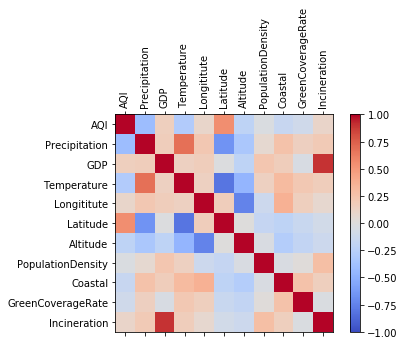

                        AQI  Precipitation       GDP  Temperature  \
AQI                1.000000      -0.401560  0.160341    -0.283956   
Precipitation     -0.401560       1.000000  0.176784     0.685561   
GDP                0.160341       0.176784  1.000000     0.145780   
Temperature       -0.283956       0.685561  0.145780     1.000000   
Longititute        0.093900       0.222742  0.173041     0.141277   
Latitude           0.552652      -0.656475 -0.010124    -0.807119   
Altitude          -0.204753      -0.323643 -0.208952    -0.459426   
PopulationDensity -0.026496       0.066066  0.229402     0.144923   
Coastal           -0.150656       0.259684  0.174241     0.305894   
GreenCoverageRate -0.097734       0.153176 -0.039220     0.216575   
Incineration       0.106898       0.201322  0.899550     0.173590   

                   Longititute  Latitude  Altitude  PopulationDensity  \
AQI                   0.093900  0.552652 -0.204753          -0.026496   
Precipitation         0.2

In [48]:
get_Correlation(df)

In [11]:
df.rename(columns={'Incineration(10,000ton)': 'Incineration'}, inplace=True)

In [15]:
df.columns

Index(['AQI', 'Precipitation', 'GDP', 'Temperature', 'Longititute', 'Latitude',
       'Altitude', 'PopulationDensity', 'Coastal', 'GreenCoverageRate',
       'Incineration'],
      dtype='object')

In [55]:

def scatter_show(X,Y,DATA):
    
    sns.jointplot(x=X, y=Y, data=DATA)
    

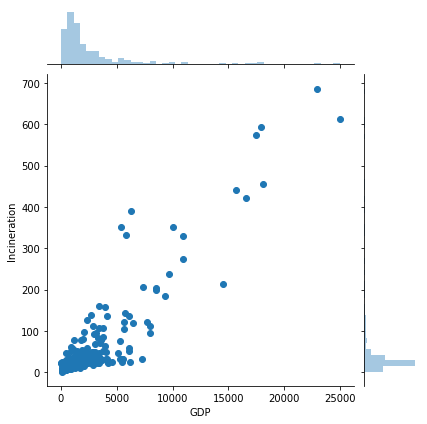

In [57]:
#GDP and Incineration : 0.899550
scatter_show('GDP', 'Incineration', df)



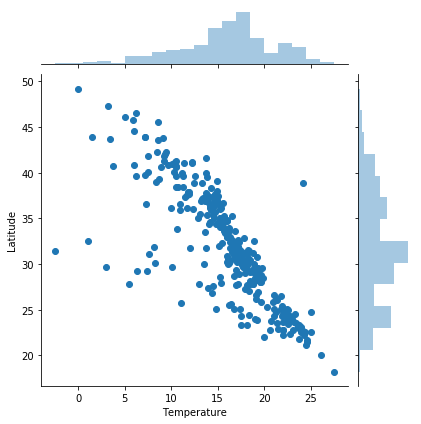

In [58]:
#Temperature and Latitude : -0.807119
scatter_show('Temperature', 'Latitude', df)

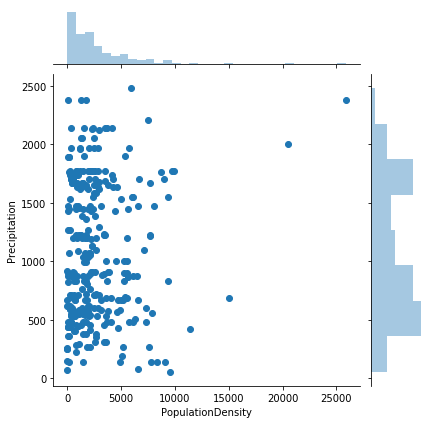

In [59]:
#PopulationDensity and Precipitation : 0.066066

scatter_show('PopulationDensity', 'Precipitation', df)